In [1]:
import sys
sys.path.insert(1, "../")
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
data = scipy.io.loadmat("../data/v1_laminar.mat")
srate = data["srate"]
csd = data["csd"]
timevec = data["timevec"].T


chan1idx = 0
chan2idx = 7

centFreq = 8
time = np.arange(-1.5, 1.5, 1/srate)
s = 8/(2*np.pi*centFreq)
wavelet = np.exp(2*1j*np.pi*centFreq*time) * np.exp(-time**2 / (2*s**2))
halfWavN = len(time) // 2

nWave = len(time)
nData = csd.shape[1]
nConv = nWave + nData - 1

waveletX = scipy.fft.fft(wavelet, nConv)
waveletX = waveletX / np.max(waveletX)

phaseData = np.zeros((2, len(timevec)))
realData = np.zeros((2, len(timevec)))

dataX = scipy.fft.fft(csd[chan1idx,:,0], nConv)
as_ = scipy.fft.ifft(waveletX*dataX, nConv)
as_ = as_[halfWavN:-halfWavN]

phaseData[0,:] = np.angle(as_)
realData[0,:] = np.real(as_)

dataX = scipy.fft.fft(csd[chan2idx,:,0], nConv)
as_ = scipy.fft.ifft(waveletX*dataX, nConv)
as_ = as_[halfWavN:-halfWavN]

phaseData[1,:] = np.angle(as_)
realData[1,:] = np.real(as_)

C:\Users\kerem\AppData\Local\Temp\ipykernel_9404\3241094066.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  time = np.arange(-1.5, 1.5, 1/srate)


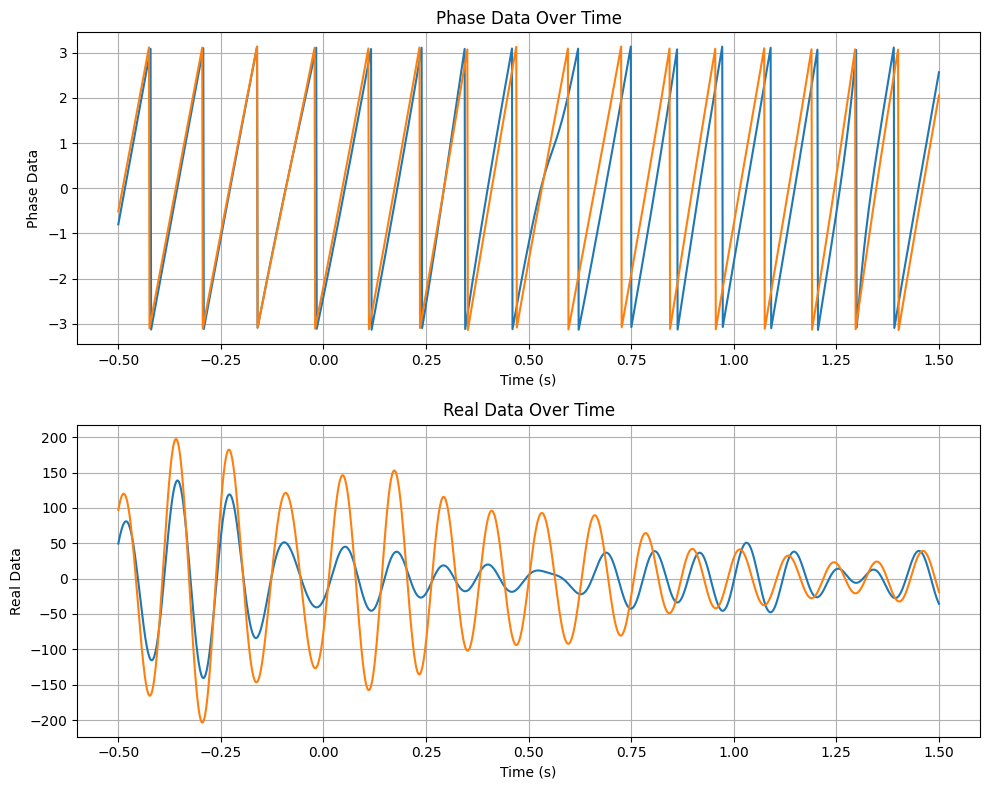

In [3]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))  

axes[0].plot(timevec, phaseData.T)
axes[0].set_title("Phase Data Over Time")
axes[0].set_xlabel("Time (s)")
axes[0].set_ylabel("Phase Data")
axes[0].grid(True)

axes[1].plot(timevec, realData.T)
axes[1].set_title("Real Data Over Time")
axes[1].set_xlabel("Time (s)")
axes[1].set_ylabel("Real Data")
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [4]:
phaseAngleDifferences = phaseData[0,:] - phaseData[1,:]

eulerPhaseDifferences = np.exp(1j*phaseAngleDifferences)

meanComplexVector = np.mean(eulerPhaseDifferences)

phaseSynchronization = abs(meanComplexVector)

print(f"Synchronization between {chan1idx} to {chan2idx} is {round(phaseSynchronization, 5)}")

Synchronization between 0 to 7 is 0.84666


In [5]:
phaseSynchronization = abs(np.mean(np.exp(1j*np.diff(phaseData, axis=0))))
print(f"Synchronization between {chan1idx} to {chan2idx} is {round(phaseSynchronization, 5)}")

phaseSynchronizationBackwards = abs(np.mean(np.exp(1j*-np.diff(phaseData, axis=0))))
print(f"Synchronization between {chan1idx} to {chan2idx} is {round(phaseSynchronizationBackwards, 5)}")

Synchronization between 0 to 7 is 0.84666
Synchronization between 0 to 7 is 0.84666
